In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/PhageDMS-20C-mAbs.csv', index_col='replicate')
plot_df = df.loc[['20C_36 rep1', '20C_36 rep2', '20C_59 rep1', '20C_59 rep2',
                  '20C_67 rep1', '20C_67 rep2', '20C_82 rep1', '20C_82 rep2',
                  '20C_119 rep1', '20C_119 rep2', '20C_130 rep1', '20C_130 rep2',
                  '20C_174 rep1', '20C_174 rep2', '20C_192 rep1', '20C_192 rep2',
                  '20C_210 rep1', '20C_210 rep2'
                 ]]

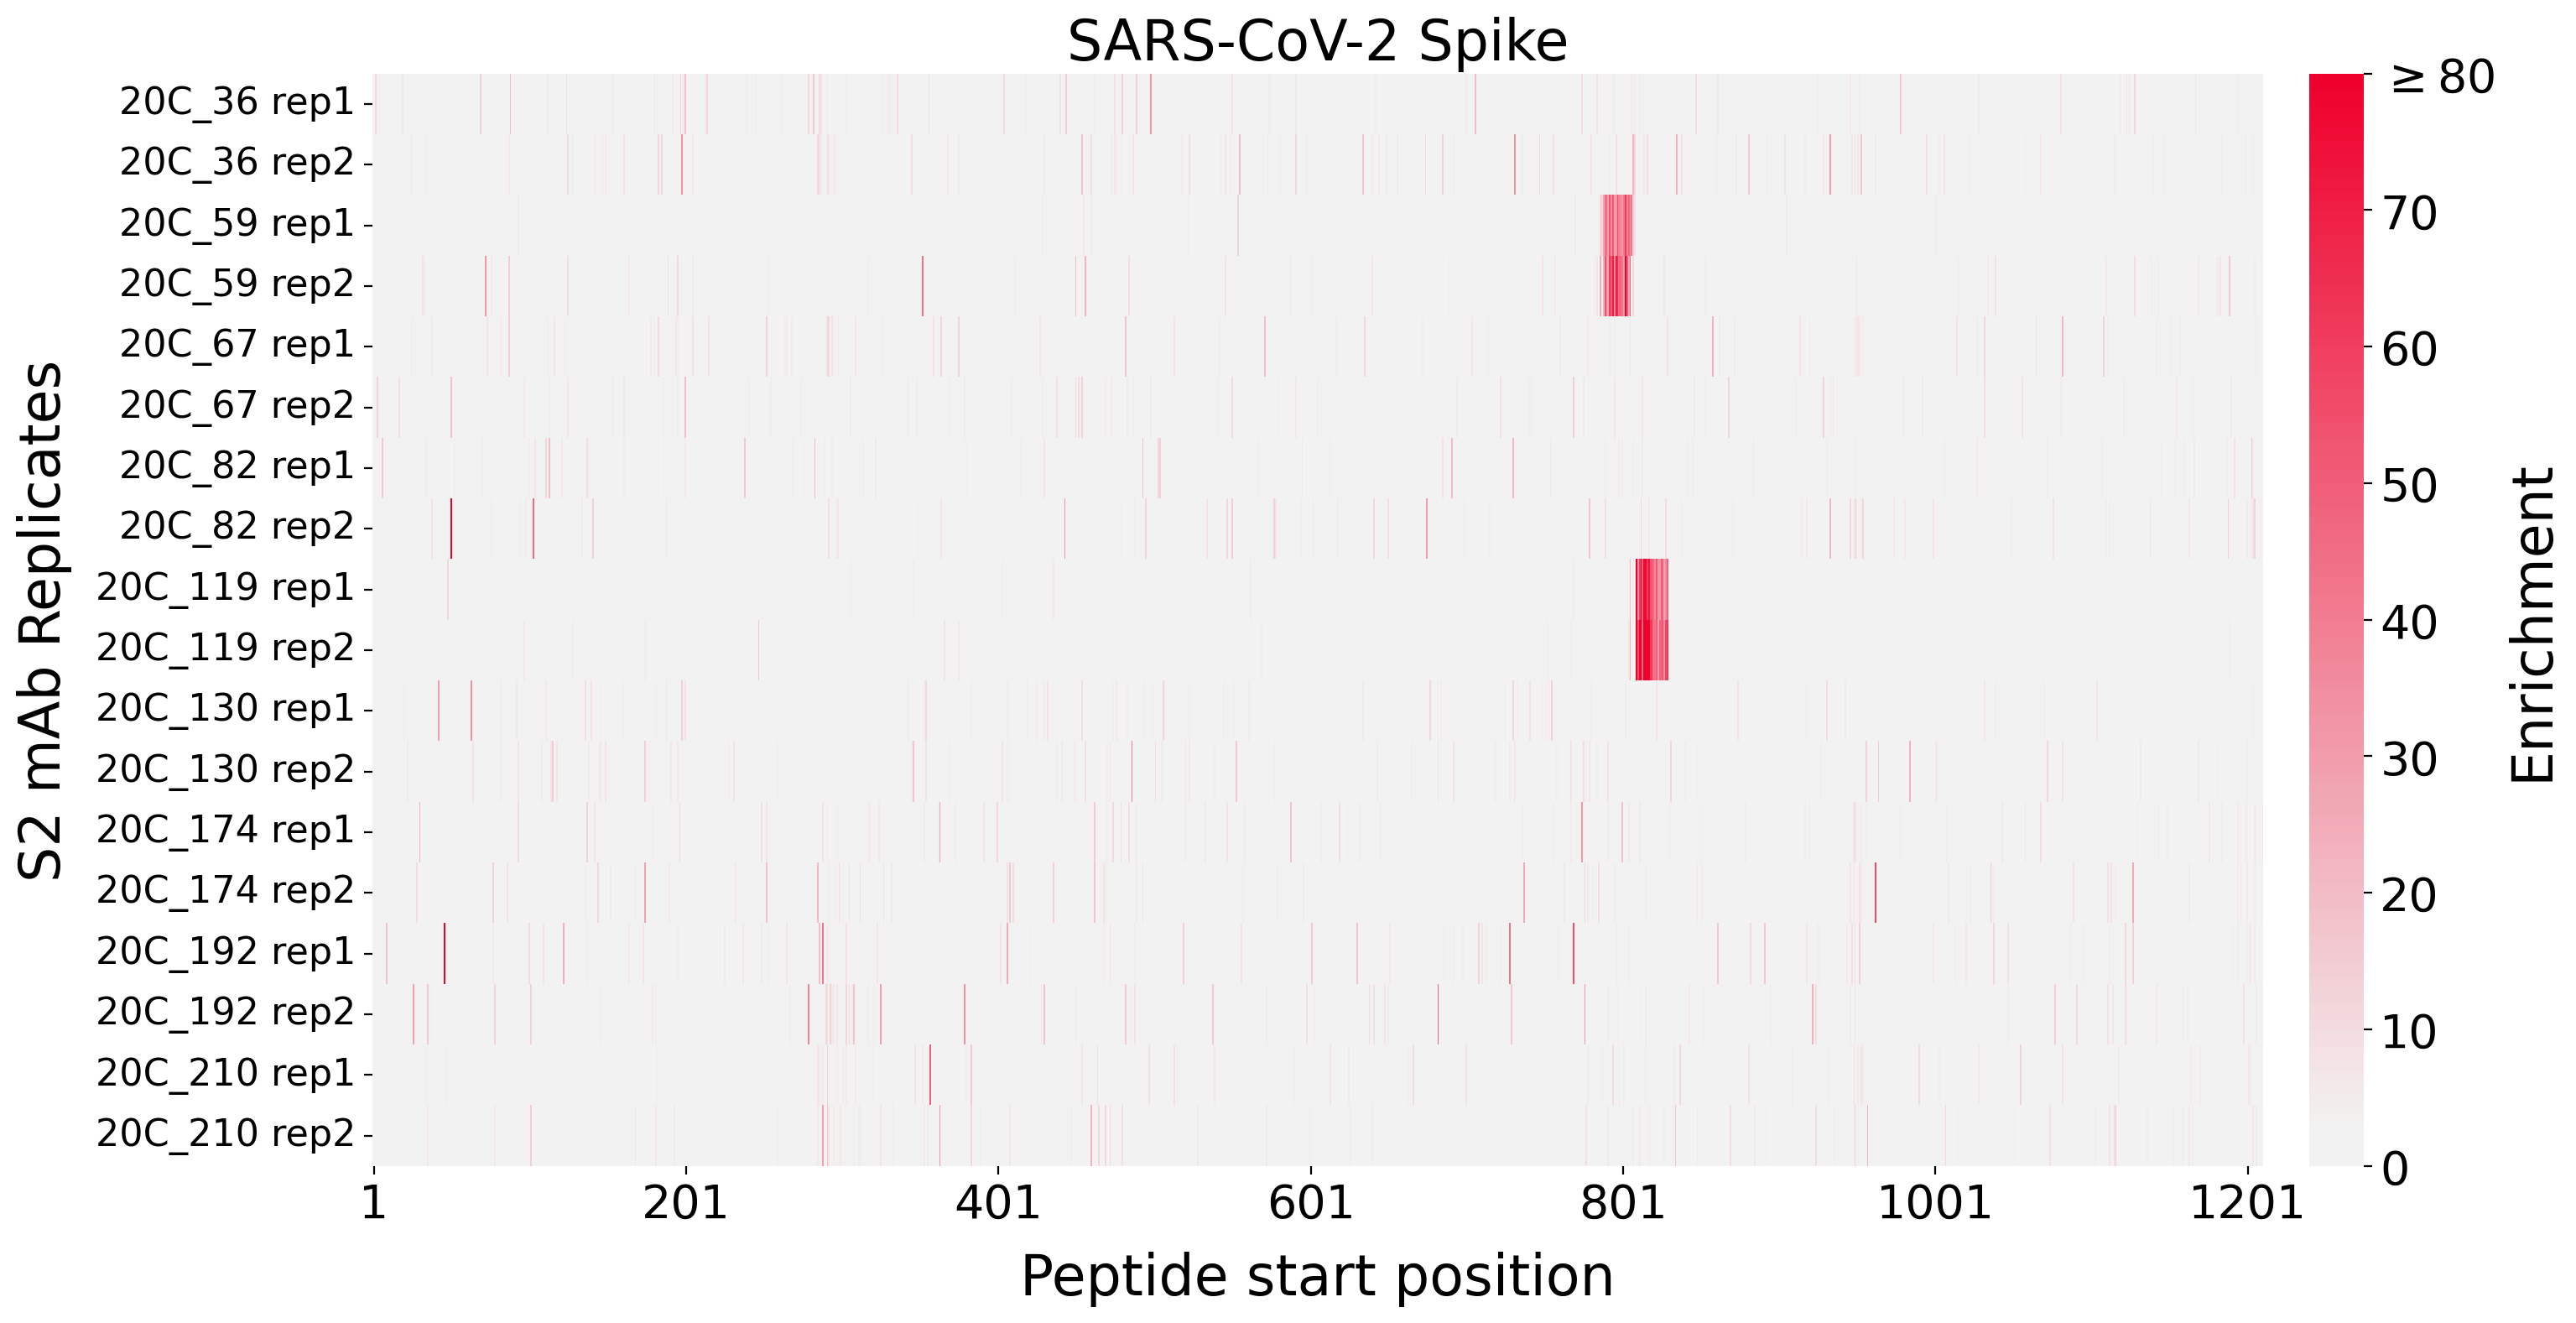

In [3]:
vmin=0
vmax=80
cmap_yticklabels = [0, 10, 20, 30, 40, 50, 60, 70]
cmap_yticklabels.append(f'$\geq{vmax}$')
xticklabels = [1,201,401,601,801,1001,1201]

fig, ax = plt.subplots(figsize=[16,8])
cmap = sns.diverging_palette(240, 10, s=100, l=50, sep=10, as_cmap=True)
sns_ax = sns.heatmap(plot_df, cmap=cmap, center=0, square=False, vmin=vmin, vmax=vmax,
                     cbar_kws={"label": 'Enrichment', "pad": 0.02})
ax.set_title('SARS-CoV-2 Spike', fontsize=24)
ax.tick_params(axis="x", labelsize=20, rotation=0)
ax.set_xlabel('Peptide start position', fontsize=24, verticalalignment='top', labelpad=10)
ax.xaxis.set_major_locator(plt.FixedLocator(xticklabels))
ax.set_xticklabels(xticklabels)
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel(f'S2 mAb Replicates', fontsize=24, labelpad=10)
sns_ax.figure.axes[-1].yaxis.label.set_size(24)
sns_ax.collections[0].colorbar.ax.tick_params(labelsize=20)
sns_ax.collections[0].colorbar.ax.set_yticklabels(cmap_yticklabels)
plt.tight_layout()
plt.savefig(f"20C_mAbs_enr_heatmap.pdf")
plt.show()